In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

from tensorflow import keras
from keras import layers
from keras.layers import Dense
from keras.models import Sequential, load_model

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import scale

import warnings

warnings.filterwarnings('ignore')

2024-01-15 06:44:49.454187: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-15 06:44:49.456147: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-15 06:44:49.498119: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-15 06:44:49.499416: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-15 06:44:50.082653: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

<h3>1) Data preparation and stardartization</h3>

In [2]:
df = pd.read_csv('./data/regresion_data.csv')

df = df.drop(columns='Unnamed: 0')
df = df.drop(columns='label')

df

,axial_max,tang_max,index_of_axm,index_of_tnm,axial_in_mxt,tang_in_mxa,cone_angl,frequancy
0,-16.549675,-17.654378,28,48,-10.975493,-16.597827,4,126.984123
1,-16.564726,-17.815883,28,52,-14.410172,-16.724255,4,126.984123
2,-16.335568,-17.578816,28,50,-12.664116,-16.415995,4,125.152626
3,-15.968865,-17.108087,28,47,-10.236513,-15.878571,4,120.879120
4,-15.227270,-16.266240,28,49,-12.056063,-15.246275,4,114.774117
...,...,...,...,...,...,...,...,...
701,-12.023019,-7.729243,22,39,-9.648130,-6.059585,15,76.312576
702,-12.288681,-7.505596,25,40,-10.345298,-5.331225,15,77.533577
703,-12.301400,-7.318260,23,40,-10.514462,-5.200852,15,78.754578
704,-12.464419,-6.943085,23,39,-9.774318,-4.769759,15,77.533577


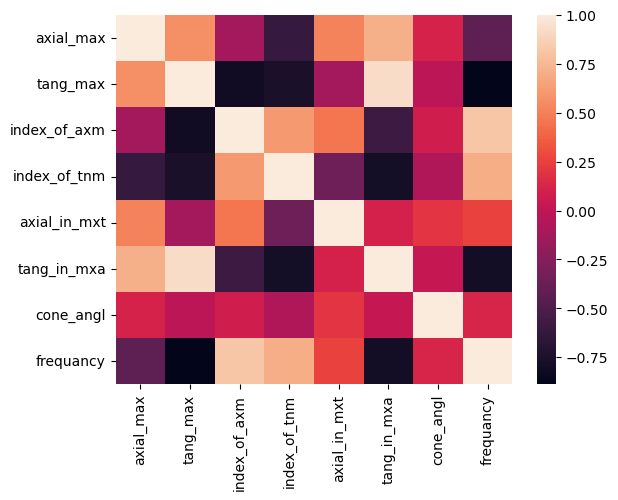

In [3]:
# Let's build correlation and some graphs
sns.heatmap(df.corr())

# And some estimators
print()

In [4]:
X = df.drop(columns='frequancy')
y = df['frequancy']



# standartization and train test split
mean = X.mean(axis=0)
std = X.std(axis=0)
X -= mean
X /= std
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape[1])


7


<h3>2) Simple model for regression</h3>

In [5]:
model = Sequential()
'''
model.add(Dense(7, activation='relu', input_shape = (X_train.shape[1], )))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
# model.add(layers.Dropout(0.5))
model.add(Dense(256, activation='relu'))
# model.add(layers.Dropout(0.25))
model.add(Dense(512, activation='relu'))
# model.add(layers.Dropout(0.4))
model.add(Dense(256, activation='relu'))
# model.add(layers.Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))
'''
model.add(Dense(7, activation='relu', input_shape = (X_train.shape[1], )))

model.add(Dense(14, activation='relu'))

model.add(Dense(7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse', 'mae'])



2024-01-15 06:44:56.783847: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [6]:
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=1200)

Epoch 1/1200
15/15 [==============================] - 1s 11ms/step - loss: 6765.7842 - mse: 6765.7842 - mae: 66.8217 - val_loss: 7039.2837 - val_mse: 7039.2837 - val_mae: 70.4527
Epoch 2/1200
15/15 [==============================] - 0s 3ms/step - loss: 6755.4902 - mse: 6755.4902 - mae: 66.8005 - val_loss: 7024.5625 - val_mse: 7024.5625 - val_mae: 70.4109
Epoch 3/1200
15/15 [==============================] - 0s 2ms/step - loss: 6736.2295 - mse: 6736.2295 - mae: 66.7510 - val_loss: 6992.4790 - val_mse: 6992.4790 - val_mae: 70.2946
Epoch 4/1200
15/15 [==============================] - 0s 2ms/step - loss: 6699.3599 - mse: 6699.3599 - mae: 66.6369 - val_loss: 6939.1973 - val_mse: 6939.1973 - val_mae: 70.0991
Epoch 5/1200
15/15 [==============================] - 0s 2ms/step - loss: 6637.8442 - mse: 6637.8442 - mae: 66.4399 - val_loss: 6846.6235 - val_mse: 6846.6235 - val_mae: 69.7422
Epoch 6/1200
15/15 [==============================] - 0s 2ms/step - loss: 6528.1069 - mse: 6528.1069 - mae: 6

5/5 [==============================] - 0s 1ms/step


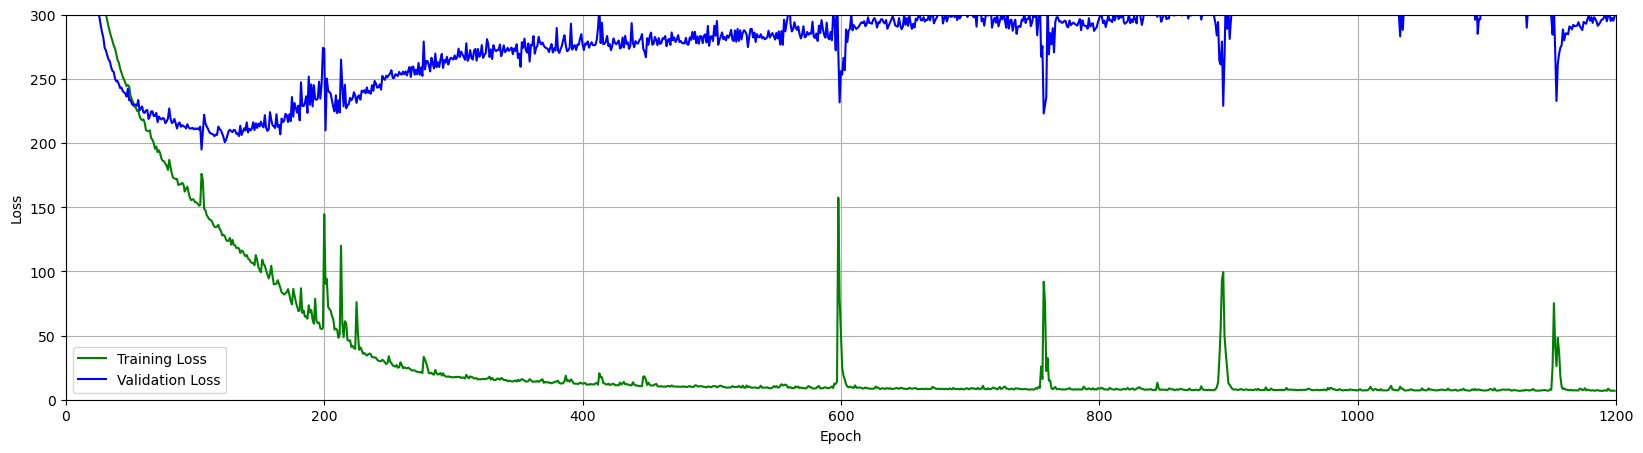

In [7]:
def plot_loss(history):
    plt.figure(figsize=(20,5))
    plt.plot(history.history['loss'], 'g', label='Training Loss')
    plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
    plt.xlim([0, 1200])
    plt.ylim([0, 300])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

plot_loss(history)

y_pred = np.array(model.predict(X_test))

In [8]:
print(y_pred.shape)
print(y_pred.dtype)
print(type(y_pred))
print(Y_test.shape)

(142, 1)
float32
<class 'numpy.ndarray'>
(142,)


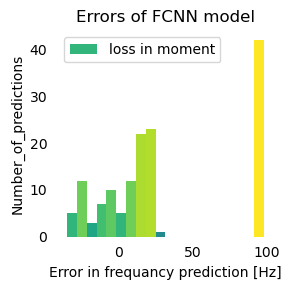

In [9]:
losses = y_pred[0] - Y_test
'''
for i in range(len(losses)):
    if(losses[i] >= 25):
        losses[i] = 0
'''
fig, axs = plt.subplots(1, 1,
                        figsize =(3, 3),
                        tight_layout = True)
legend = ['loss in moment']

for s in ['top', 'bottom', 'left', 'right']:
    axs.spines[s].set_visible(False)

axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')

axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')

# Add x, y gridlines
'''axs.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)'''

# Add Text watermark
'''fig.text(0.9, 0.15, 'Jeeteshgavande30',
         fontsize = 12,
         color ='red',
         ha ='right',
         va ='bottom',
         alpha = 0.7)'''

#
n_bins = 20
N, bins, patches = axs.hist(losses, bins = n_bins)
# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
 
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
 
# Adding extra features   
plt.xlabel("Error in frequancy prediction [Hz]")
plt.ylabel("Number_of_predictions")
plt.legend(legend)
plt.title('Errors of FCNN model')
 
# Show plot
plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 14)                112       
                                                                 
 dense_2 (Dense)             (None, 7)                 105       
                                                                 
 dense_3 (Dense)             (None, 7)                 56        
                                                                 
 dense_4 (Dense)             (None, 7)                 56        
                                                                 
 dense_5 (Dense)             (None, 7)                 56        
                                                                 


 dense_6 (Dense)             (None, 4)                 32        
                                                                 
 dense_7 (Dense)             (None, 4)                 20        
                                                                 
 dense_8 (Dense)             (None, 1)                 5         
                                                                 
Total params: 498
Trainable params: 498
Non-trainable params: 0
_________________________________________________________________
None


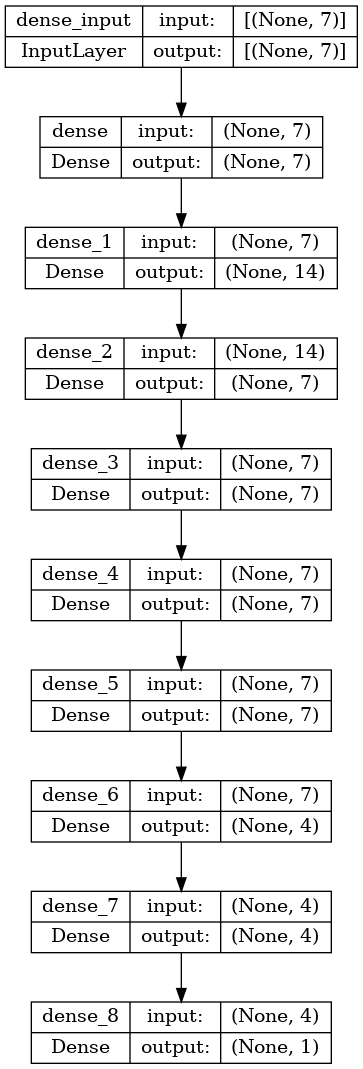

In [10]:
from keras import models  
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation  
from keras_visualizer import visualizer 
from keras import layers 
from keras.utils import plot_model

print(model.summary())

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

<h3>3) Recurent Regression model  </h3>

In [11]:
from keras import regularizers
from tensorflow.keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from tensorflow.keras.callbacks import ReduceLROnPlateau
model = Sequential()

model.add(Dense(7, activation='relu', input_shape = (X_train.shape[1], )))

model.add(Dense(64,
                activity_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dense(16,
                activity_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dense(1))


In [12]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=5, min_lr=0.000001, verbose=1)
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mse', 'mae'])

history = model.fit(X_train, Y_train, validation_split=0.4, epochs=1200, batch_size = 100)


Epoch 1/1200
4/4 [==============================] - 1s 43ms/step - loss: 6787.8101 - mse: 6787.6089 - mae: 67.0899 - val_loss: 6892.8940 - val_mse: 6892.8433 - val_mae: 68.9318
Epoch 2/1200
4/4 [==============================] - 0s 7ms/step - loss: 6756.7847 - mse: 6756.5791 - mae: 66.9213 - val_loss: 6889.9590 - val_mse: 6889.9092 - val_mae: 68.9141
Epoch 3/1200
4/4 [==============================] - 0s 9ms/step - loss: 6725.7388 - mse: 6725.5283 - mae: 66.7643 - val_loss: 6887.5913 - val_mse: 6887.5415 - val_mae: 68.9044
Epoch 4/1200
4/4 [==============================] - 0s 9ms/step - loss: 6699.6382 - mse: 6699.4209 - mae: 66.6312 - val_loss: 6885.3013 - val_mse: 6885.2505 - val_mae: 68.9021
Epoch 5/1200
4/4 [==============================] - 0s 8ms/step - loss: 6675.1030 - mse: 6674.8789 - mae: 66.5464 - val_loss: 6882.5820 - val_mse: 6882.5303 - val_mae: 68.9041
Epoch 6/1200
4/4 [==============================] - 0s 8ms/step - loss: 6652.5591 - mse: 6652.3301 - mae: 66.4954 - val

5/5 [==============================] - 0s 1ms/step


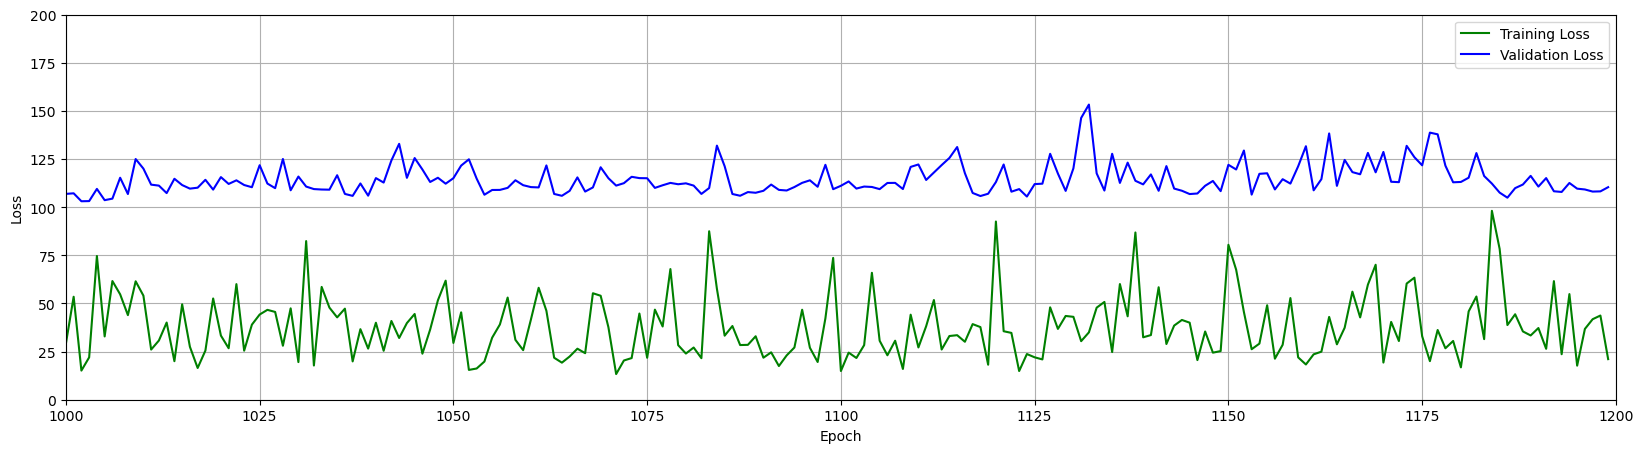

In [13]:
def plot_loss(history):
    plt.figure(figsize=(20,5))
    plt.plot(history.history['loss'], 'g', label='Training Loss')
    plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
    plt.xlim([1000, 1200])
    plt.ylim([0, 200])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

plot_loss(history)

y_pred = np.array(model.predict(X_test))

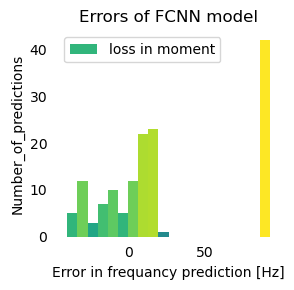

In [14]:
losses = np.array(y_pred[0] - Y_test)

fig, axs = plt.subplots(1, 1,
                        figsize =(3, 3),
                        tight_layout = True)
legend = ['loss in moment']

for s in ['top', 'bottom', 'left', 'right']:
    axs.spines[s].set_visible(False)

axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')

axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')

# Add x, y gridlines
'''axs.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)'''

# Add Text watermark
'''fig.text(0.9, 0.15, 'Jeeteshgavande30',
         fontsize = 12,
         color ='red',
         ha ='right',
         va ='bottom',
         alpha = 0.7)'''

#
n_bins = 20
N, bins, patches = axs.hist(losses, bins = n_bins)
# Setting color
fracs = ((N**(1 / 5)) / N.max())
norm = colors.Normalize(fracs.min(), fracs.max())
 
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
 
# Adding extra features   
plt.xlabel("Error in frequancy prediction [Hz]")
plt.ylabel("Number_of_predictions")
plt.legend(legend)
plt.title('Errors of FCNN model')
 
# Show plot
plt.show()

In [15]:
print(losses.shape)
print(type(losses))

(142,)
<class 'numpy.ndarray'>
